# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Regresión lineal I</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>

El objetivo de esta actividad es poner en práctica los algoritmos para la estimación de modelos de regresión lineal. Para ello, se implementarán y usarán, a través de sucesivos ejercicios, dos algoritmos que permiten estimar los modelos de regresión lineal simple y múltiple.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

##  <font color="#7F000E"> Regresión lineal simple</font>


<br>
En esta parte, utilizaremos un modelo de regresión lineal para modelar el consumo de un coche en función de su peso, y a partir de una serie de datos. 
<br>

Un modelo de regresión lineal simple expresa una variable de salida, $y$, como función lineal de una variable de entrada $x$:

$$
y = \theta_0 + \theta_1 x
$$



<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 1</font></h3>


El archivo `auto.txt` contiene los datos de peso y consumo para un conjunto de coches. Se trata de leer y almacenar estos datos en una matriz (array Numpy) denominado `datos` y, posteriormente, almacenar la primera columna (correspondiente al peso) en un array denominado `X` y la segunda (correspondiente al consumo) en otro array denominado `Y`.  También se guardará el número de casos en una variable denominada `N`.

In [2]:
# Lectura de los datos
datos = np.loadtxt('auto.txt')
N,_ = datos.shape 
X = datos[:,0]
Y = datos[:,1]
print(datos[:5,:])
datos.shape
# print(N,_ )

[[ 0.88677308  9.046538  ]
 [ 1.26506912 13.067222  ]
 [ 1.83931706 18.093077  ]
 [ 1.85065687 13.440571  ]
 [ 1.0759211   9.800417  ]]


(50, 2)

El código siguiente dibujará una gráfica de dispersión de estos datos.

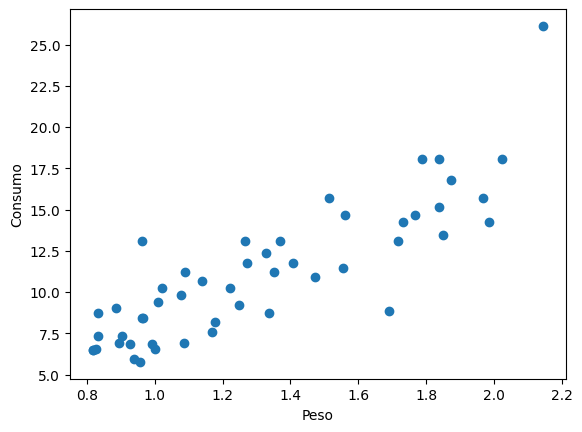

In [3]:
# Gráfica de dispersión
plt.scatter(X,Y)
plt.xlabel('Peso')
plt.ylabel('Consumo')
plt.show();

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 2</font></h3>


Cada par de valores $(\theta_0, \theta_1)$ da lugar a una recta distinta en el plano. Sobre la gráfica anterior, dibujar rectas que vayan desde el punto $x=0.5$ al $x=2.5$, y tal que:

* Una recta corresponda a los parámetros ($\theta_0=1$, y  $\theta_1=5$) (discontínua, con color rojo).
* Una corresponda a los parámetros ($\theta_0=-8$, y  $\theta_1=20$), (discontínua, con color azul).

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>  Para cada recta, basta con definir dos puntos (los de los extremos), y que denominaremos `(r1_x,r1_y)`, y `(r2_x,r2_y)`.  Como se dispone de los valores de $x$, se utilizan $(\theta_0, \theta_1)$ para calcular los de $y$.
</div>

Una vez hecha la gráfica, se puede dibujar una tercera recta ajustando manualmente los parámetros $(\theta_0, \theta_1)$ para, por aproximación, obtener la recta que más se ajusta a la tendencia de los datos.

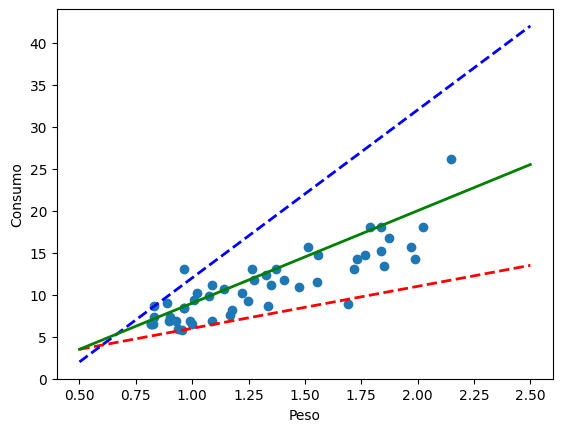

In [4]:
plt.scatter(X,Y)
plt.xlabel('Peso')
plt.ylabel('Consumo')

# Recta 1
r1_x = np.array([0.5, 2.5])
r1_y =  1+r1_x*5

plt.plot(r1_x, r1_y, 'r--', lw=2)  # Dibuja la recta en rojo

# Recta 2
r2_x = np.array([0.5, 2.5])
r2_y =  -8+r2_x*20

plt.plot(r2_x, r2_y, 'b--', lw=2)  # Dibuja la recta en azul

# Recta 3
r3_x = np.array([0.5, 2.5])
r3_y =  -2+r3_x*11

plt.plot(r3_x, r3_y, 'g', lw=2);  # Dibuja la recta en verde
plt.show()
#print(r1_x,r1_y)
#print(r2_x,r2_y)
#[ 0.5  2.5] [  3.5  13.5]
#[ 0.5  2.5] [  2.  42.]

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>


---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 3</font></h3>


En el ejercicio anterior se ha visto que diferentes combinaciones de parámetros $(\theta_0, \theta_1)$ dan lugar a diferentes rectas. También se ha comprobado _visualmente_ que unas aproximan los datos mejor que otras. La aproximación que hace cada una de las rectas a los datos se puede cuantificar como el _error cuadrático medio_, expresado como:

$$
\qquad error(\theta_0, \theta_1) = \frac{1}{N}\sum_{i=0}^N \left(y^{(i)} -(\theta_0 + \theta_1 x^{(i)})\right)  ^2  
$$

Esta expresión calcula, para cada caso $x^{(i)}$, el cuadrado de la diferencia entre el valor $y^{(i)}$,  y el valor de la recta en $x^{(i)}$, que sería el correspondiente en la recta de regresión. Posteriormente, los suma.

<br>
Implementar una función, denominada `error`, que dados ($X, Y, \theta_0, \theta_1$), devuelva el error correspondiente a la recta  $(\theta_0, \theta_1)$ con respecto a los datos. Utilizar esa función para obtener el coste de las dos rectas anteriores, y de la que hayáis estimado (de haberlo hecho) manualmente. 

¿Cual es mejor? ¿Corresponde eso con lo que se aprecia visualmente en la gráfica?

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>  Se puede implementar el cuerpo de la función en una sola línea.
</div>



In [5]:
def error(X,Y, theta_0, theta_1): 
    return  1/len(Y)*np.sum((Y-(theta_0+theta_1*X))**2)

print('El error de la recta (1,5) es {:.2f}'.format(error(X,Y,1,5)))
print('El error de la recta (-8,20) es {:.2f}'.format(error(X,Y,-8,20)))


El error de la recta (1,5) es 19.72
El error de la recta (-8,20) es 72.23


<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i> El modelo representado con la recta definida por $\theta=(1,5)$ produce un menor error. Esto se corresponde con lo que se aprecia en la gráfica donde, si bien ninguna recta ajusta a los datos propiamente, la correspondiente a estos parámetros (roja) ajusta algo más.
</div>

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>



---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 4</font></h3>

<br>

Es posible obtener los valores óptimos para los parámetros, es decir, los que representan la recta con la que se minimiza el error, como:

$$
\theta_1=\frac{\sum_{i=1}^N (x^{(i)}-\bar{x})(y^{(i)}-\bar{y})}{\sum_{i=1}^N (x^{(i)}-\bar{x})^2}
$$

$$
\theta_0 = \bar{y}-\theta_1\bar{x}
$$

Obtener estos parámetros y dibujar los datos con la recta correspondiente. Imprimir el error.  ¿Cual sería el consumo que predice el modelo para un coche con 2 toneladas? 

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>
   El peso de un coche de 2 toneladas se calcula como $\theta_0+\theta_1*2$, es decir, corresponde al punto $Y$ de la recta cuando $X=2$.
</div>

In [6]:
# Obtiene los parámetros.
mean_x = np.mean(X)
mean_y = np.mean(Y)
theta_1 = np.sum((X-mean_x)*(Y-mean_y))/np.sum((X-mean_x)**2)
theta_0 = mean_y-theta_1*mean_x

# El error
print('El error mínimo es:  {:.2f}'.format(error(X,Y, theta_0, theta_1)))


# El error para un coche con dos toneladas
print('El consumo para un coche de 2 toneladas es: {:.2f}'.format((theta_0+theta_1*2)))

# Dibuja los puntos
plt.scatter(X,Y)
plt.xlabel('Peso')
plt.ylabel('Consumo')

# Dibuja la recta
r1_x = np.array([0.5, 2.5])
r1_y = theta_0 + r1_x*theta_1
plt.plot(r1_x, r1_y, 'r', lw=2);

# El error mínimo es:  4.53
# El consumo para un coche de 2 toneladas es: 17.37

El error mínimo es:  4.53
El consumo para un coche de 2 toneladas es: 17.37


<br>
<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>



---

## <font color="#7F000E"> Regresión lineal multivariada</font>
<br>

El archivo `bodyfat.txt` contiene un conjunto de datos relativos al porcentaje de grasa corporal de un grupo de sujetos, con algunas características como su edad, su peso, la longitud de la circunferencia de su cuello, etc. (se puede encontrar una descripción completa de los datos [aquí](http://lib.stat.cmu.edu/datasets/bodyfat)). En este ejercicio, se trata de elaborar un modelo de regresión lineal que tome varias variables de entrada para predecir el porcentaje de grasa corporal a partir de estas características. 


La regresión lineal multivariada se utiliza cuando el número de variables de entrada es $k>1$. En este modelo, la salida se expresa como una combinación lineal de las $k$ variables de entrada, es decir:

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots \theta_k x_k
$$

<br>
El error asociado a un modelo, $\theta = ( \theta_0,  \theta_1 , \ldots,  \theta_k)$, con respecto al conjunto de datos, se expresa en este caso como:

$$
error(\theta) = \frac{1}{N}\sum_{i=0}^C \left(y^{(i)} - (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots \theta_k x_k^{(i)})\right)^2    
$$

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>
  Puede apreciarse que es similar al anterior, con la salvedad de que ahora la obtención de la variable de salida se hace utilizando $k$ variables de entrada y $k+1$ parámetros.
</div>



<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 5</font></h3>





Cargar el archivo en una matriz denominada `datos`, obtener el número de casos y almacenarlo en una variable denominada $N$, y el número de variables, que se almacenará en una variable denominada $k$ (tened en cuenta que la última columna no es una variable de entrada, sino la salida).  Almacenar las $k$ primeras columnas de `datos` en una matriz denominada $X$, de dimensión $(N,k)$. Almacenar la última columna en un array unidimensional denominado $Y$, con dimensión $N$. Por ejemplo, si:

$$
datos = \left[\begin{array}{c c c}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{array}\right],
$$


entonces:

$$
X = \left[\begin{array}{c c}
1 & 2 \\
4 & 5 \\
7 & 8 \\
\end{array}\right], \qquad 
Y = \left[\begin{array}{c}
3 \\
6 \\
9 \\
\end{array}\right].
$$




Añadir una columna a la izquierda de la matriz  $X$  cuyo valor sea $1$ para todas las filas. Utilizando el ejemplo anterior (esto se hace para poder sumar el término independiente $\theta_0$ en las operaciones vectoriales):

$$
X = \left[\begin{array}{c c c}
1 & 1 & 2\\
1 &4 & 5\\
1 &7 & 8\\
\end{array}\right].
$$

Finalmente $N=3$ y $k=3$, ya que aunque hemos descartado una variable de entrada, luego se ha añadido una columna con unos.

In [7]:
# Carga los datos
datos = np.loadtxt('bodyfat.txt')
N,k = datos.shape

print(N," casos, ",k-1," variables")

# Obtiene las variables de entrada y de salida.
X = datos[:,:-1]
#k = k-1
Y = datos[:,-1]

# Añade una columna con todos los valores a 1.
X = np.hstack((np.ones((N,1)), X))
#k=k+1

#252  casos,  14  variables

252  casos,  14  variables


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
 Hay que controlar las dimensiones al utilizar `hstack()` porque, si se le pasa un vector con dimensión $(N,)$, considera qun tamaño $(1,N)$.
</div>

<br>
<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>



---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 6</font></h3>


Dado un modelo definido por un conjunto de parámetros $\theta$, y un cojunto de entrada $X$, se puede obtener el vector con las predicciones del modelo, $\hat{Y}$,  como $X \cdot \theta$ (producto vectorial). Con el caso anterior, y utilizando un modelo cualquiera, por ejemplo $\theta=(1,2,4)$, es decir, $\theta_0=1, \theta_1=2$ y $\theta_2=4$:

<br>

$$
\hat{Y} = X \cdot \theta = \left[\begin{array}{c c c}
1 & 1 & 2 \\
1 & 4 & 5 \\
1 & 7 & 8 \\
\end{array}\right] \cdot 
\left[\begin{array}{c}
1 \\
2 \\
4 \\
\end{array}\right] = 
\left[\begin{array}{c}
1\cdot1+1\cdot2+2\cdot4\\
1\cdot1+4\cdot2+5\cdot4\\
1\cdot1+7\cdot2+8\cdot4\\
\end{array}\right]=
\left[\begin{array}{c}
11\\
29\\
47\\
\end{array}\right]
$$ 

<br>
Obtener las salidas, $\hat{Y}$, que se generarían para el dataset $X$ con un modelo en el que todos los valores fueran $0.1$, es decir, $\theta = ( 0.1, 0.1, \ldots, 0.1)$. Imprimir la predicción para el primer caso. 

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>  Se puede implementar el cuerpo de la función en una sola línea.
</div>

In [8]:
theta = np.ones(k)*0.1
pred_Y = X @ theta

print("La predicción para el primero de los elementos es: ", pred_Y[0])
# La predicción para el primero de los elementos es:  74.59708

La predicción para el primero de los elementos es:  74.59708


<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>



---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 7</font></h3>


Implementar ahora una función, denominada `error_mul`, que dados $X$, $Y$ y $\theta$ devuelva el error del modelo. Imprimir el error para el modelo de ejemplo utilizado anteriormente, es decir, $\theta = ( 0.1, 0.1, \ldots, 0.1)$.

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>  Se puede implementar el cuerpo de la función en una sola línea.
</div>

In [9]:
def error_mul(X, Y, theta):
    return  np.sum(((X @ theta)-Y)**2)/N

print("El error de predicción de este modelo es: ", error_mul(X,Y,np.ones(k)*0.1))

#El error de predicción de este modelo es:  4223.11648144

El error de predicción de este modelo es:  4223.116481442463


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>    `X.dot(theta)` o `X@theta` devuelven la predicción del modelo. `X.dot(theta)-Y`, por tanto es un vector que contiene el error para cada fila en `X`, que posteriormente se eleva al cuadrado. Con la función `np.sum()` se suman todos los componentes del array, y finalmente se dividen. 
       

<br>
Aunque un poco artificial, `np.sum((X.dot(theta)-Y)**2)` es equivalente a `np.dot((np.dot(X,theta)-Y).T,(np.dot(X,theta)-Y))`, es decir, a multiplicar (matricialmente) una fila con los errores por la columna con esos mismos errores.
</div>

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>


---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 8</font></h3>

Uno de los modos de obtener el valor óptimo de los parámetros $\theta$, dados los datos de entrada $X$ y de salida $Y$ es mediante la _ecuación normal_. Teniendo en cuenta que $\hat{Y} = X \cdot \theta$ partimos de que buscamos:
$$
X \cdot  \theta = Y
$$

$X$ no siempre es invertible, sin embargo $(X^T,X)$ sí que lo es. Por tanto, multiplicamos por $X^T$ (la traspuesta de $X$) en ambos lados de la igualdad: 

$$
(X^T \cdot X) \cdot  \theta = X^T \cdot Y
$$

Multiplicamos en ambos lados por $(X^T,X)^{-1}$, es decir, por la inversa de $(X^T,X)$:

$$
(X^T \cdot X)^{-1} (X^T \cdot X) \cdot  \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot Y
$$

Como la multiplicación de una matriz por la inversa es la matriz identidad, queda:

$$
\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot Y
$$


Obtener los valores óptimos de $\theta$ mediante esta expresión. Imprimirlos.

In [10]:
inv = np.linalg.inv
theta = inv(X.T @ X) @X.T @ Y
print(theta)

#[ -6.66969804e+00   1.08164715e+01   1.18560353e-03   2.09099106e-02
#   1.12116500e-02   1.54901224e-02   1.09636088e-01  -4.40300672e-03
#   4.58947732e-04  -5.61802302e-04  -1.01436163e-02   3.30465240e-02
#   1.01942061e-01   1.79469659e-02   7.37252454e-02]

[-6.66969804e+00  1.08164715e+01  1.18560354e-03  2.09099106e-02
  1.12116500e-02  1.54901224e-02  1.09636088e-01 -4.40300672e-03
  4.58947733e-04 -5.61802302e-04 -1.01436163e-02  3.30465240e-02
  1.01942061e-01  1.79469659e-02  7.37252454e-02]


<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>



---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 9</font></h3>


Con los valores obtenidos de $\theta$ ¿cual sería la predicción para el duodécimo caso de la base de datos?


In [11]:
print("El valor de salida real para el primer caso es: ", Y[11])
print("El valor del modelo para el primer caso es: {:.2f}".format(X[11,:]@theta))

#El valor de salida real para el primer caso es:  19.0
#El valor del modelo para el primer caso es: 19.20

El valor de salida real para el primer caso es:  19.0
El valor del modelo para el primer caso es: 19.20


<br>
<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>



---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#004D7F"></i> Ejercicio 10</font></h3>



Obtener, mediante la función implementada en el ejercicio 7, el error correspondiente al modelo óptimo.

In [12]:
print("El error óptimo del modelo es: {:.2f}".format(error_mul(X,Y,theta)))

#El error óptimo del modelo es: 0.25

El error óptimo del modelo es: 0.25


<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>
Con estos ejercicios hemos visto una implementación sencilla, basada en la ecuación normal, del algoritmo que permite obtener un modelo óptimo de regresión lineal. La obtención de los parámetros $\theta$ en el ejercicio 8, puede requerir algunos segundos incluso siendo la base de datos relativamente pequeña. Esto se debe a que el cálculo de la inversa o pseudinversa tiene un orden de complejidad ${\cal{O}}N^3$. Por ello, en la práctica se usan otros algoritmos, como el *__gradiente descendiente__*. 

Además de para hacer predicción, los modelos obtenidos en regresión lineal se utilizan también en el análisis exploratorio de los datos. Este aspecto se tratará en profundidad en el módulo 3 del curso.
</div>




<br>
<div style="text-align: right"> <font size=5> [<i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F">]</i></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>